OTSU BINARISATION

In [7]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
path=r'D:/Study/Python/openCV/College/res/'

(512, 512)


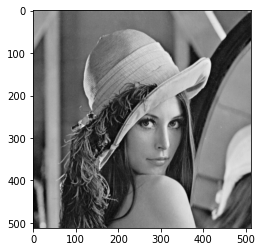

In [8]:
img = cv2.imread(path+'lena.tif',0)
plt.imshow(img,'gray')
print(img.shape)

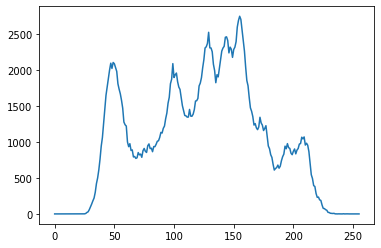

In [9]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

In [10]:
freq_arr=np.zeros(256,'uint64')
for i in range (img.shape[0]):
    for j in range(img.shape[1]):
        freq_arr[img[i][j]]=freq_arr[img[i][j]]+1

sum1=img.shape[0]*img.shape[1]
print(freq_arr)

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    1    6   20
   29   59   97  137  181  220  300  421  500  613  760  940 1061 1254
 1442 1647 1762 1881 1998 2093 2020 2103 2086 2031 1979 1807 1732 1668
 1578 1469 1276 1238 1220  999  934  975  881  889  791  798  771  779
  852  820  831  786  878  909  869  853  947  972  907  913  864  935
  934  967 1009 1016 1062 1132 1123 1188 1220 1323 1401 1538 1619 1808
 1870 2087 1894 1932 1956 1836 1762 1729 1612 1504 1434 1367 1362 1344
 1345 1451 1358 1356 1384 1448 1567 1572 1604 1777 1817 1893 2029 2141
 2304 2321 2368 2522 2306 2304 2252 2078 1992 1822 1933 1903 2025 2136
 2261 2303 2327 2453 2459 2408 2236 2316 2287 2174 2283 2316 2392 2595
 2687 2745 2701 2555 2411 2261 2041 1852 1780 1615 1473 1425 1352 1234
 1254 1195 1170 1208 1342 1263 1233 1158 1186 1225 1085  943  905  822
  785  689  609  630  644  678  635  663  739  795  830  941  905  976
  920 

In [11]:
def backgroung(threshold):
    tot=tot1=tot3=Vb=Wb=Mb=0
    for i in range(threshold):
        tot=tot+freq_arr[i]
    Wb=tot/sum1
    if Wb==0:
        return 0
    for i in range(threshold):
        tot1=tot1+ i*freq_arr[i]
    Mb=tot1/tot
    for i in range(threshold):
        tot3=tot3+ (i-Mb)*(i-Mb)*freq_arr[i]
    Vb=tot3/tot
    return Vb*Wb



In [12]:
def foregroung(threshold):
    tot=tot1=tot3=Vf=Wf=Mf=0
    for i in range(threshold,256):
        tot=tot+freq_arr[i]
    Wf=tot/sum1
    if Wf==0:
        return 0
    for i in range(threshold,256):
        tot1=tot1+ i*freq_arr[i]
    Mf=tot1/tot
    for i in range(threshold,256):
        tot3=tot3+ (i-Mf)*(i-Mf)*freq_arr[i]
    Vf=tot3/tot
    return Vf*Wf


In [13]:
Variance=np.zeros(256,'float64')
for i in range (256):
    Variance[i]=foregroung(i)+backgroung(i)

print(Variance)

[2290.11256954 2290.11256954 2290.11256954 2290.11256954 2290.11256954
 2290.11256954 2290.11256954 2290.11256954 2290.11256954 2290.11256954
 2290.11256954 2290.11256954 2290.11256954 2290.11256954 2290.11256954
 2290.11256954 2290.11256954 2290.11256954 2290.11256954 2290.11256954
 2290.11256954 2290.11256954 2290.11256954 2290.11256954 2290.11256954
 2290.11256954 2290.07514485 2289.8551053  2289.13646858 2288.11566888
 2286.08130768 2282.80488379 2278.27145584 2272.40338382 2265.41496594
 2256.07565963 2243.2239358  2228.24881654 2210.22694964 2188.27677791
 2161.57704988 2131.91006659 2097.35666593 2058.14785385 2013.89283292
 1967.05100793 1917.53524315 1865.40788264 1811.2432364  1759.38825625
 1705.8370434  1653.13274249 1602.23609947 1553.07241341 1508.61913938
 1466.47845365 1426.37143431 1388.90706626 1354.50985001 1325.09289956
 1297.03280873 1269.86278183 1248.03722822 1228.0581424  1207.65002878
 1189.61977134 1171.84869276 1156.42110951 1141.25316566 1126.98277742
 1112.

In [14]:
print(np.argmin(Variance))
threshold_value=np.argmin(Variance)

118


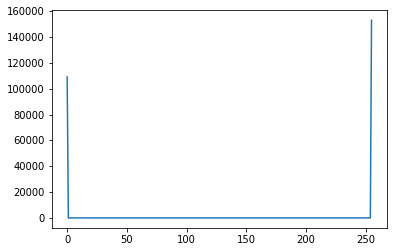

In [15]:
new_img=np.zeros(img.shape,'uint16')
for i in range (img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j]<threshold_value:
            new_img[i][j]=0
        else:
            new_img[i][j]=255

hist = cv2.calcHist([new_img],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

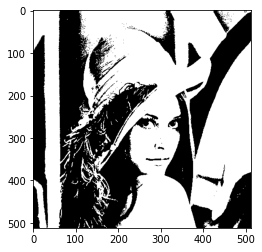

In [16]:
plt.imshow(new_img,'gray')